In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Algorithm import Kmeans, get_2D_graph, scaler

In [2]:
df = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\Iris.csv')

In [3]:
df.drop(['Id','Species'], axis=1, inplace=True)

In [4]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

In [5]:
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


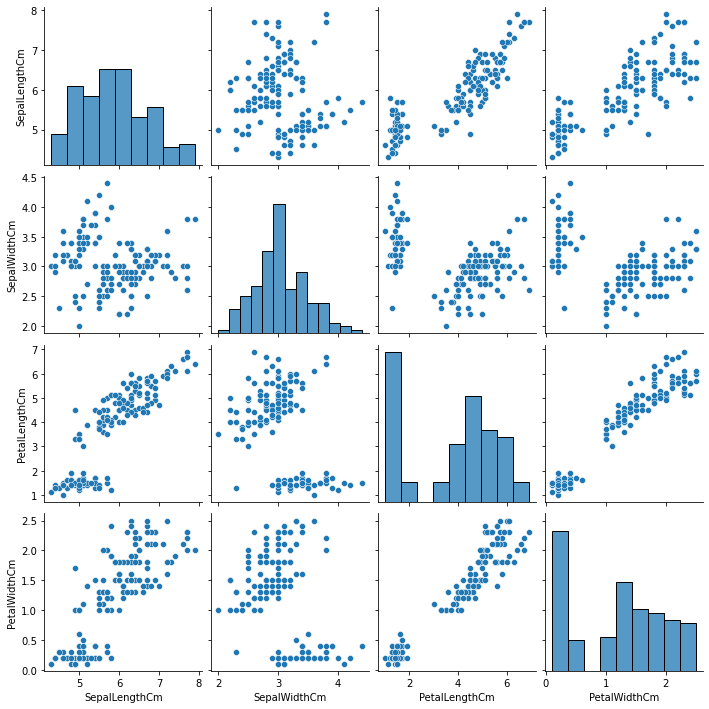

In [7]:
sns.pairplot(data=df)

In [8]:
df = scaler(df)

In [9]:
kmeans = Kmeans(df, 3)

In [10]:
centers = kmeans.get_centers_uniform_method()

In [11]:
labels, clusters = kmeans.get_clusters_simple_method(centers)

In [12]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1
 0 0 0 1 1 0 1 1 1 1 1 2 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [13]:
print(clusters)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.284933      0.534722       0.203903      0.174874
1       0.529915      0.337073       0.674707      0.680556
2       0.694444      0.715278       0.675141      0.673611


In [14]:
df_check = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\Iris.csv')

In [15]:
df_check.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

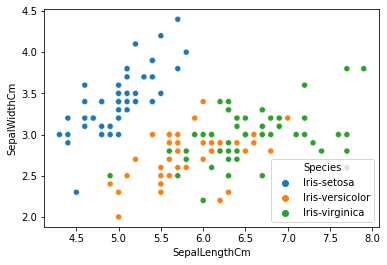

In [18]:
sns.scatterplot(data=df_check,x= 'SepalLengthCm',y= 'SepalWidthCm', hue='Species')

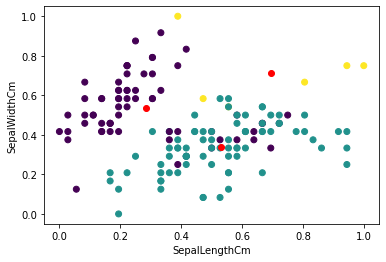

In [19]:
get_2D_graph(df, centers,labels,x_name='SepalLengthCm',y_name='SepalWidthCm')

In [21]:
df['Cluster'] = labels

In [22]:
df['Cluster'].value_counts()

1    78
0    66
2     6
Name: Cluster, dtype: int64

In [23]:
df['Cluster'] = df['Cluster'].apply(lambda x: ('Iris-setosa' if x==0
                             else 'Iris-virginica' if x==1
                             else 'Iris-versicolor'))

In [24]:
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Cluster
0         0.222222      0.625000       0.067797      0.041667     Iris-setosa
1         0.166667      0.416667       0.067797      0.041667     Iris-setosa
2         0.111111      0.500000       0.050847      0.041667     Iris-setosa
3         0.083333      0.458333       0.084746      0.041667     Iris-setosa
4         0.194444      0.666667       0.067797      0.041667     Iris-setosa
..             ...           ...            ...           ...             ...
145       0.666667      0.416667       0.711864      0.916667  Iris-virginica
146       0.555556      0.208333       0.677966      0.750000  Iris-virginica
147       0.611111      0.416667       0.711864      0.791667  Iris-virginica
148       0.527778      0.583333       0.745763      0.916667  Iris-virginica
149       0.444444      0.416667       0.694915      0.708333  Iris-virginica

[150 rows x 5 columns]

In [25]:
df['Species'] = df_check['Species']

In [26]:
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Cluster  \
0         0.222222      0.625000       0.067797      0.041667     Iris-setosa   
1         0.166667      0.416667       0.067797      0.041667     Iris-setosa   
2         0.111111      0.500000       0.050847      0.041667     Iris-setosa   
3         0.083333      0.458333       0.084746      0.041667     Iris-setosa   
4         0.194444      0.666667       0.067797      0.041667     Iris-setosa   
..             ...           ...            ...           ...             ...   
145       0.666667      0.416667       0.711864      0.916667  Iris-virginica   
146       0.555556      0.208333       0.677966      0.750000  Iris-virginica   
147       0.611111      0.416667       0.711864      0.791667  Iris-virginica   
148       0.527778      0.583333       0.745763      0.916667  Iris-virginica   
149       0.444444      0.416667       0.694915      0.708333  Iris-virginica   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [23]:
conditions = [df_scale['Cluster'] == df_scale['Species'], 
              df_scale['Cluster'] != df_scale['Species']]

choices = [int(1), int(0)]

df_scale['check'] = np.select(conditions, choices, default=1)

In [24]:
df_scale[df_scale['check']==1]['check'].sum()/len(df_scale.index)

0.4

In [29]:
ratio = check_labels(labels,df_check['Species'] )

In [30]:
ratio

0.0

In [27]:
y[label_col_name] = labels

NameError: name 'y' is not defined

In [30]:
y = pd.DataFrame(clusters)

In [31]:
y

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.284933      0.534722       0.203903      0.174874
1       0.529915      0.337073       0.674707      0.680556
2       0.694444      0.715278       0.675141      0.673611